In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [3]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/expresiones.npz')
# extract the first array
X_train = dict_data['arr_0']
# print the array
print(X_train.shape)

(23481, 40, 40)


In [4]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/expresiontest.npz')
# extract the first array
X_test = dict_data['arr_0']
# print the array
print(X_test.shape)

(6236, 40, 40)


In [5]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/labelstraining.npz')
# extract the first array
Y_train = dict_data['arr_0']
# print the array
print(Y_train.shape)

(23481,)


In [6]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/labeltest.npz')
# extract the first array
Y_test = dict_data['arr_0']
# print the array
print(Y_test.shape)

(6236,)


(23481, 40, 40)


Text(0.5, 1.0, 'Ground Truth : 3')

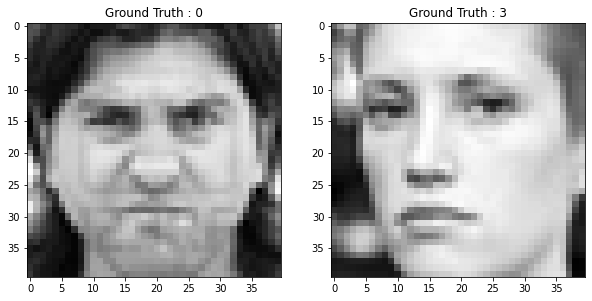

In [7]:
plt.figure(figsize=[10,10])
train_X=X_train
train_Y=Y_train
print(train_X.shape)
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(train_X[20222,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[20222]))

Text(0.5, 1.0, 'Ground Truth : 1')

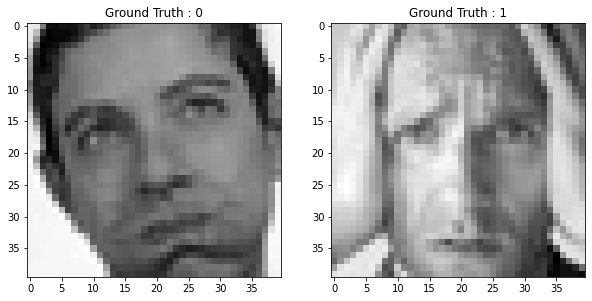

In [8]:
#Graficamos un par de imagenes
plt.figure(figsize=[10,10])
test_X=X_test
test_Y=Y_test
plt.subplot(121)
plt.imshow(test_X[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

plt.subplot(122)
plt.imshow(test_X[1220,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[1220]))

In [9]:
# Cambiamos las etiquetas a one-hot encondig
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


print('Etiqueta original:', train_Y[0])
print('Etiqueta en one-hot:', train_Y_one_hot[0])

Etiqueta original: 0
Etiqueta en one-hot: [1. 0. 0. 0. 0.]


In [10]:
#Crear los grupos de entrenamiento y validación
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)

In [11]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(21132, 40, 40) (2349, 40, 40) (21132, 5) (2349, 5)


In [12]:
# Modificamos la dimensión de las imágenes de (350,350) a  ( 350, 350, 1) para que no haya problema con la lectura de datos
train_X = np.copy(train_X)[...,None]
test_X = np.copy(test_X)[...,None]
valid_X= np.copy(valid_X)[...,None]
print(train_X.shape,test_X.shape,valid_X.shape)

(21132, 40, 40, 1) (6236, 40, 40, 1) (2349, 40, 40, 1)


In [26]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = .2 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 250 # cantidad de imágenes que se toman a la vez en memoria

In [27]:
expresion_model = Sequential()
expresion_model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(40,40,1)))
expresion_model.add(MaxPooling2D((2, 2),padding='same'))


expresion_model.add(Conv2D(128, kernel_size=(5, 5),activation='relu',padding='same'))
expresion_model.add(MaxPooling2D((2, 2),padding='same'))

expresion_model.add(Conv2D(254, kernel_size=(3, 3),activation='relu',padding='same'))
expresion_model.add(MaxPooling2D((2, 2),padding='same'))

expresion_model.add(Flatten())
expresion_model.add(Dense(512, activation='relu'))
expresion_model.add(Dropout(0.10))

expresion_model.add(Dense(5, activation='softmax'))

In [28]:
expresion_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),
                     metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:
expresion_train = expresion_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/20
85/85 [==============================] - 335s 4s/step - loss: 1.5709 - accuracy: 0.3027 - val_loss: 1.5534 - val_accuracy: 0.3227
Epoch 2/20
85/85 [==============================] - 336s 4s/step - loss: 1.5483 - accuracy: 0.3157 - val_loss: 1.5136 - val_accuracy: 0.3546
Epoch 3/20
85/85 [==============================] - 335s 4s/step - loss: 1.4880 - accuracy: 0.3681 - val_loss: 1.4499 - val_accuracy: 0.3819
Epoch 4/20
85/85 [==============================] - 334s 4s/step - loss: 1.4105 - accuracy: 0.4122 - val_loss: 1.3428 - val_accuracy: 0.4479
Epoch 5/20
85/85 [==============================] - 335s 4s/step - loss: 1.3374 - accuracy: 0.4508 - val_loss: 1.3189 - val_accuracy: 0.4585
Epoch 6/20
85/85 [==============================] - 334s 4s/step - loss: 1.2691 - accuracy: 0.4799 - val_loss: 1.2359 - val_accuracy: 0.5006
Epoch 7/20
85/85 [==============================] - 335s 4s/step - loss: 1.2076 - accuracy: 0.5149 - val_loss: 1.2079 - val_accuracy: 0.5134
Epoch 8/20
85

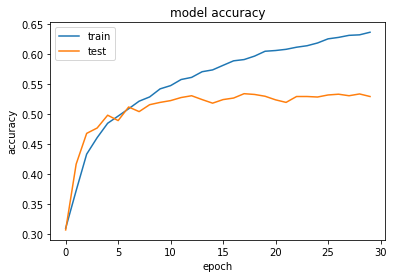

In [ ]:
# summarize history for accuracy
plt.plot(expresion_train.history['accuracy'])
plt.plot(expresion_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

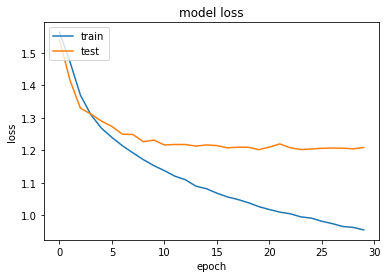

In [ ]:
plt.plot(expresion_train.history['loss'])
plt.plot(expresion_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_eval = expresion_model.evaluate(valid_X, valid_label, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

74/74 [==============================] - 1s 16ms/step - loss: 1.2085 - accuracy: 0.5292
El modelo predice el  52.916133403778076 % de los datos


In [ ]:
from keras.models import model_from_json
# serializar el modelo a JSON
model_json = expresion_model.to_json()
with open("modelexpresiones.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
expresion_model.save_weights("pesosexpresione.h5")
print("Modelo Guardado!")

Modelo Guardado!
